In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

Найдем градиент оптимизируемой функции:
\begin{equation}
\nabla Q = \sum^m_{i=1} \frac{ -y_i \cdot \exp(−y_i \cdot < x_i , \omega >)}{1 + \exp(−y_i \cdot <x_i , \omega >)}
\vec{x_{i}}
\end{equation}

Для потсчета будем избегать прямого вычисления экспоненты, чтобы не получить переполнение.

In [537]:
def risk_function(w,X,Y):
    exp_arg = [-Y[i] * np.sum(X[i]*w) for i in range(len(Y))]
    return np.sum(np.logaddexp(0,exp_arg[i]) for i in range(len(Y)))

def grad_risk_function(w,X,Y):
    S = []
    
    exp_arg1 = [-Y[i] * np.sum(X[i]*w) for i in range(len(Y))]
    exp_arg2 = np.array([np.logaddexp(0,exp_arg1[i]) for i in range(len(Y))]) 
    prep = np.array([np.exp(exp_arg1[i] - exp_arg2[i]) for i in range(len(Y))])
    
    for j in range(len(w)):
        S.append(np.sum(-Y[i] * prep[i] * X[i][j] for i in range(len(Y))))
    return np.array(S)

def armijo_step_size(w, X, Y,s):
    grad = grad_risk_function(w,X,Y)
#     print(grad)
    a = 0.25
    b = 0.5
    dw = np.ones_like(w)
    while (risk_function(w - s*grad,X,Y) > 
           risk_function(w,X,Y) + a * s * (-1)* np.sum(grad*grad)):
        s = b*s
#     print(s)
    return s

# points, classes, number of iterations
def gradient_descent(X,Y,eps=1e-2,init=[0,1,-1],abort=int(1e6)):
    dim = len(X[0])
    X = np.array([np.concatenate([[-1],x]) for x in X])
    w_old = np.zeros(dim+1)
    w_new = np.array(init)
    k = 0
    w_all = []
    w_all.append(w_new)
    s = 0.99
    while(np.abs(risk_function(X,Y,w_old) - risk_function(X,Y,w_new)) > eps) :
        w_old = w_new
        w_new = w_new - grad_risk_function(w_new,X,Y)*armijo_step_size(w_new,X,Y,s=s)
#         s=s**(3/2)
        w_all.append(w_new)

#         print(armijo_step_size(w_old,X,Y))
        if k > 995:
            print(risk_function(X,Y,w_new))
            print(risk_function(X,Y,w_old))
            print("###########")
        k += 1
        if k >= abort:
            break
    return w_all, k

# def log_loss(x, y, weights):
#     return np.sum(np.log(1 + np.exp(-y[i] * np.dot(x[i], weights))) for i in range(len(y)))

# def exp_interval(x, y, w):
#     return np.array([np.exp(-y[i] * np.dot(x[i], w)) for i in range(len(y))])

# def gradient(x, y, w):
#     exp_int = exp_interval(x, y, w)
    
#     return np.array([np.sum(exp_int[i] / (1 + exp_int[i]) * (-y[i] * x[i][j]) for i in range(len(y))) \
#                     for j in range(len(w))])
                    
# def calc_step_armiho(x, y, w):
#     grad = gradient(x, y, w)
#     #print(grad)
    
#     a = 0.25
#     b = 0.5
#     s = 1
#     dw = np.ones_like(w)
    
#     while (log_loss(x, y, w - s*grad) > log_loss(x, y, w) + 
#           a * s * np.transpose(grad).dot(-grad)):
#         s = b*s
    
#     return s
    
# def grad_descent(x, y, initial, calc_step = calc_step_armiho, precision = 1e-6,abort=1):
#     x_upd = [np.insert(x[i], 0, 1) for i in range(len(x))]
#     #print(x_upd[0])
#     x = x_upd
    
#     w_old = np.zeros(3)
#     w_new = initial
    
#     n_iter = 0
#     while (np.abs(log_loss(x, y, w_new) - log_loss(x, y, w_old)) > precision):
#         w_old = w_new
#         w_new = w_old - gradient(x, y, w_old) * calc_step(x, y, w_old)
#         print(calc_step(x, y, w_old))
#         n_iter +=1
        
#     return w_new, n_iter

In [495]:
def build_2D_line(w):
    if w[1] == 0:
        1/0
    else :
        plt.plot([-20,20],[-w[0]/w[1] - w[2]/w[1]*(-20),-w[0]/w[1] - w[2]/w[1]*(20)],color='green',alpha=0.2)
col = ['red','blue']
def build_2D_plot(X,Y,w=[]):
    n = len(X)
    plt.scatter(X[:n//2, 0], X[:n//2, 1],marker="o", c=col[(Y[0]+1)//2], alpha = 0.5)
    plt.scatter(X[n//2:, 0], X[n//2:, 1],marker="o", c=col[(Y[-1]+1)//2], alpha = 0.5)
    if len(w) !=0 :
        build_2D_line(w)

Сгенерируем два разделимых прямой множества точек на плоскости.

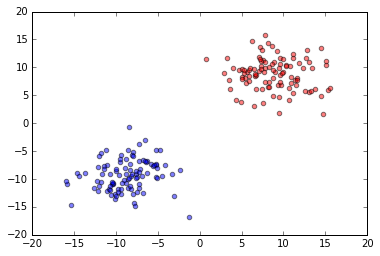

In [496]:
a,d=9,10
mean = [[a,a], [-a,-a]]
cov = [[[d,0],[0,d]],[[d,0],[0,d]]]
col = ['red','blue']
size = 100
X = [0,0]
X[0]=(sps.multivariate_normal.rvs(size=size,mean=mean[0],cov=cov[0])) #set 1
X[1]=(sps.multivariate_normal.rvs(size=size,mean=mean[1],cov=cov[1])) #set 2
X = np.concatenate([X[0],X[1]])
Y = np.concatenate([-1 * np.ones(size,dtype=int), np.ones(size,dtype=int)])
build_2D_plot(X,Y)
plt.show()

In [540]:
# w_all, n = grad_descent(X,Y,precision=1e-6,initial=[0,-1,1],abort=1000)
w_all, n = gradient_descent(X,Y,eps=1e-6,init=[0,-1,1],abort=2000)
print(w_all[-1])
print(n)

682.5982831
682.556436106
###########
682.640091041
682.5982831
###########
682.681860004
682.640091041
###########
682.723590064
682.681860004
###########
682.765281295
682.723590064
###########
682.806933771
682.765281295
###########
682.848547567
682.806933771
###########
682.890122757
682.848547567
###########
682.931659414
682.890122757
###########
682.973157612
682.931659414
###########
683.014617425
682.973157612
###########
683.056038924
683.014617425
###########
683.097422184
683.056038924
###########
683.138767276
683.097422184
###########
683.180074273
683.138767276
###########
683.221343248
683.180074273
###########
683.262574272
683.221343248
###########
683.303767418
683.262574272
###########
683.344922756
683.303767418
###########
683.386040359
683.344922756
###########
683.427120297
683.386040359
###########
683.468162641
683.427120297
###########
683.509167462
683.468162641
###########
683.550134832
683.509167462
###########
683.591064819
683.550134832
###########
683.

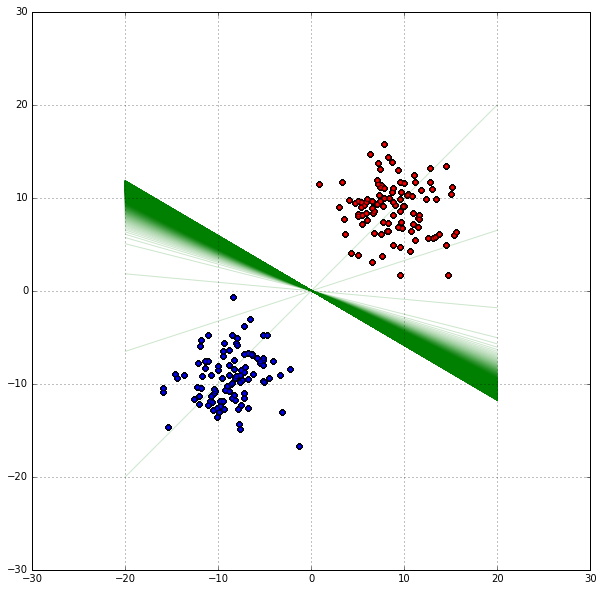

In [541]:
plt.figure(figsize=(10,10))
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.grid(True)
# build_2D_plot(X,Y,w_all)
for i in range(len(w_all)):
    build_2D_plot(X,Y,w_all[i])
plt.show()